In [557]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [558]:
df = pd.read_csv('patient.csv',)
df

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,4208,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
4208,4209,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
4209,4210,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
4210,4211,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated


In [559]:
df.isna().sum()

id                     0
sex                 3894
birth_year          3920
country                0
region              3907
group               4136
infection_reason    4082
infection_order     4177
infected_by         4150
contact_number      4180
confirmed_date         0
released_date       4184
deceased_date       4199
state                  0
dtype: int64

Preprocessing and Visualization

In [560]:
df1 = df.copy()
#Fill missing values in 'sex' with unknown
df1['sex']= df1['sex'].fillna('Unknown')
df1

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,4208,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
4208,4209,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
4209,4210,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated
4210,4211,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,isolated


In [561]:
exist = df1['group'].notna()
df1[exist]

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
30,31,female,1959.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,1160.0,2020-02-18,NaN,NaN,isolated
33,34,male,1996.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-18,NaN,NaN,isolated
34,35,female,1994.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-18,NaN,NaN,isolated
35,36,female,1972.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-18,NaN,NaN,isolated
38,39,female,1959.0,Korea,Gyeongsangbuk-do,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-18,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1532,female,1937.0,Korea,capital area,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,NaN,2020-02-27,NaN,NaN,isolated
1566,1567,female,1993.0,Korea,capital area,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,NaN,2020-02-27,NaN,NaN,isolated
1674,1675,female,1946.0,Korea,capital area,Eunpyeong St. Mary's Hospital,NaN,NaN,NaN,NaN,2020-02-27,NaN,NaN,isolated
1766,1767,female,1954.0,Korea,capital area,Eunpyeong St. Mary's Hospital,contact with patient,NaN,1768.0,NaN,2020-02-28,NaN,NaN,isolated


In [562]:
#Convert to dates to datetime
df1['confirmed_date'] = pd.to_datetime(df1['confirmed_date'])
df1['released_date'] = pd.to_datetime(df1['released_date'])
#Convert the birth_year to age using confirmed date
df1['birth_year'] = df1['confirmed_date'].dt.year - df1['birth_year']
#Rename the birth_year column
df1.rename(columns= {'birth_year' : 'age'}, inplace=True)
df1

,id,sex,age,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,36.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,56.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,54.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,56.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,33.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaT,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,4208,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaT,NaN,isolated
4208,4209,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaT,NaN,isolated
4209,4210,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaT,NaN,isolated
4210,4211,Unknown,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaT,NaN,isolated


~~~ AGE-BASED INFECTION ANALYSIS ~~~
Basic Age Statistics:
count    292.000000
mean      46.815068
std       17.336573
min        2.000000
25%       33.000000
50%       48.000000
75%       61.000000
max       83.000000
Name: age, dtype: float64

Most Common Age Groups:
age
0-20       9
21-40    110
41-60     99
61-80     71
81+        3
Name: count, dtype: int64

Percentage Distribution:
age
0-20      3.1
21-40    37.7
41-60    33.9
61-80    24.3
81+       1.0
Name: count, dtype: float64

Top 10 Most Common Ages:
age
35.0    12
64.0    10
58.0     9
23.0     9
52.0     9
63.0     8
57.0     8
61.0     7
24.0     7
36.0     7
Name: count, dtype: int64

These 86 patients represent 29.5% of cases with age data

Age Range Analysis:
• Youngest infected: 2.0 years
• Oldest infected: 83.0 years
• Median age: 48.0 years
• Mean age: 46.8 years

→ The 21-40 age group is most affected with 110 cases


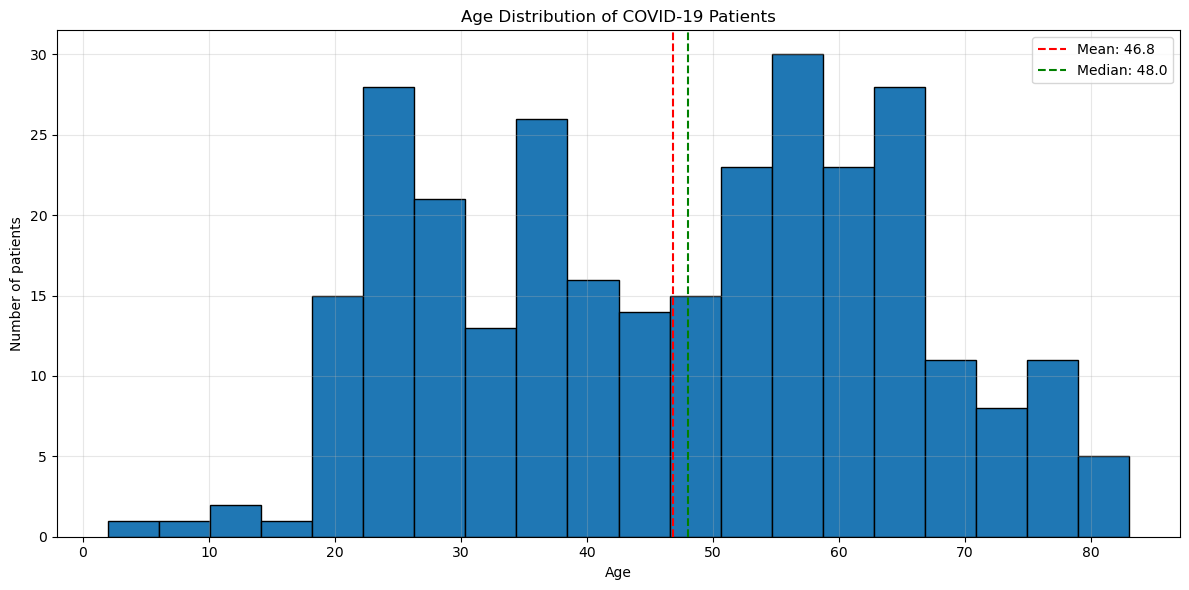

In [563]:
# Q1: Who is getting infected based on age?
print("~~~ AGE-BASED INFECTION ANALYSIS ~~~")

# Basic statistics
age_stats = df1['age'].describe()
print(f"Basic Age Statistics:\n{age_stats}\n")

# Most common age groups
print("Most Common Age Groups:")
age_groups = pd.cut(df1['age'].dropna(), bins=[0, 20, 40, 60, 80, 100], 
                   labels=['0-20', '21-40', '41-60', '61-80', '81+'])
age_group_counts = age_groups.value_counts().sort_index()
print(age_group_counts)
print(f"\nPercentage Distribution:\n{(age_group_counts/age_group_counts.sum()*100).round(1)}\n")

# Top 5 most common ages
top_ages = df1['age'].value_counts().head(10)
print("Top 10 Most Common Ages:")
print(top_ages)
print(f"\nThese {top_ages.sum()} patients represent {top_ages.sum()/df1['age'].notna().sum()*100:.1f}% of cases with age data")

# Age range with highest infection
print(f"\nAge Range Analysis:")
print(f"• Youngest infected: {df1['age'].min()} years")
print(f"• Oldest infected: {df1['age'].max()} years")
print(f"• Median age: {df1['age'].median():.1f} years")
print(f"• Mean age: {df1['age'].mean():.1f} years")

# Which age group is most at risk?
most_affected_group = age_group_counts.idxmax()
most_affected_count = age_group_counts.max()
print(f"\n→ The {most_affected_group} age group is most affected with {most_affected_count} cases")

# Visualization with annotations
plt.figure(figsize=(12,6))
df1['age'].dropna().hist(bins=20, edgecolor='black')
plt.axvline(df1['age'].mean(), color='red', linestyle='--', label=f'Mean: {df1["age"].mean():.1f}')
plt.axvline(df1['age'].median(), color='green', linestyle='--', label=f'Median: {df1["age"].median():.1f}')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age Distribution of COVID-19 Patients')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



~~~ GENDER-BASED INFECTION ANALYSIS ~~~
Gender Distribution:
• Unknown: 3894 patients (92.5%)
• Female: 163 patients (3.9%)
• Male: 155 patients (3.7%)

→ Unknown patients are most affected

Gender Distribution (excluding 'Unknown'):
• Female: 163 patients (51.3%)
• Male: 155 patients (48.7%)

Average Age by Gender:
sex
Unknown     NaN
female     48.2
male       45.3
Name: age, dtype: float64


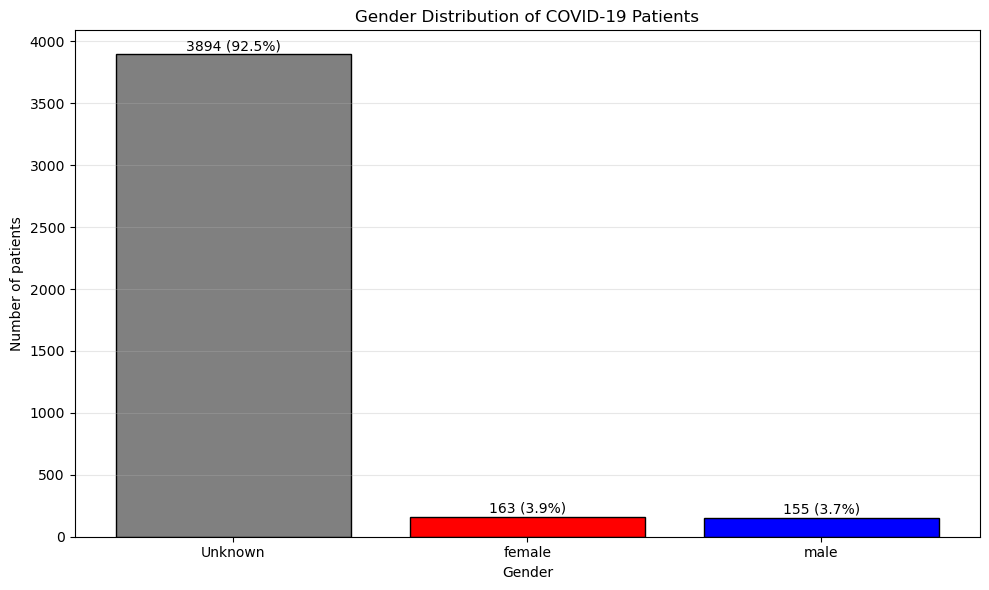

In [564]:
# Q2: Who is getting infected based on gender?
print("\n~~~ GENDER-BASED INFECTION ANALYSIS ~~~")

# Gender distribution
gender_counts = df1['sex'].value_counts()
gender_percentages = (df1['sex'].value_counts(normalize=True) * 100).round(1)

print("Gender Distribution:")
for gender, count in gender_counts.items():
    percentage = gender_percentages[gender]
    print(f"• {gender.capitalize()}: {count} patients ({percentage}%)")

# Most affected gender
most_affected_gender = gender_counts.idxmax()
print(f"\n→ {most_affected_gender.capitalize()} patients are most affected")

# Gender distribution excluding 'Unknown'
known_gender = df1[df1['sex'].isin(['male', 'female'])]
if len(known_gender) > 0:
    known_counts = known_gender['sex'].value_counts()
    known_percentages = (known_gender['sex'].value_counts(normalize=True) * 100).round(1)
    print(f"\nGender Distribution (excluding 'Unknown'):")
    for gender, count in known_counts.items():
        percentage = known_percentages[gender]
        print(f"• {gender.capitalize()}: {count} patients ({percentage}%)")

# Gender-age relationship
print(f"\nAverage Age by Gender:")
avg_age_by_gender = df1.groupby('sex')['age'].mean().round(1)
print(avg_age_by_gender)

# Visualization
plt.figure(figsize=(10,6))
colors = {'male': 'blue', 'female': 'red', 'Unknown': 'gray'}
bar_colors = [colors.get(gender, 'gray') for gender in gender_counts.index]

bars = plt.bar(gender_counts.index, gender_counts.values, color=bar_colors, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Gender Distribution of COVID-19 Patients')

# Add counts on top of bars
for i, (gender, count) in enumerate(gender_counts.items()):
    percentage = gender_percentages[gender]
    plt.text(i, count + 5,  # i is the bar index (0, 1, 2, ...)
             f'{count} ({percentage}%)',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


=== COMBINED AGE & GENDER ANALYSIS ===
Age-Gender Cross-tabulation:
sex        female  male
age_group              
0-20            5     4
21-40          46    64
41-60          62    37
61-80          37    34
81+             1     2


<Figure size 1200x800 with 0 Axes>

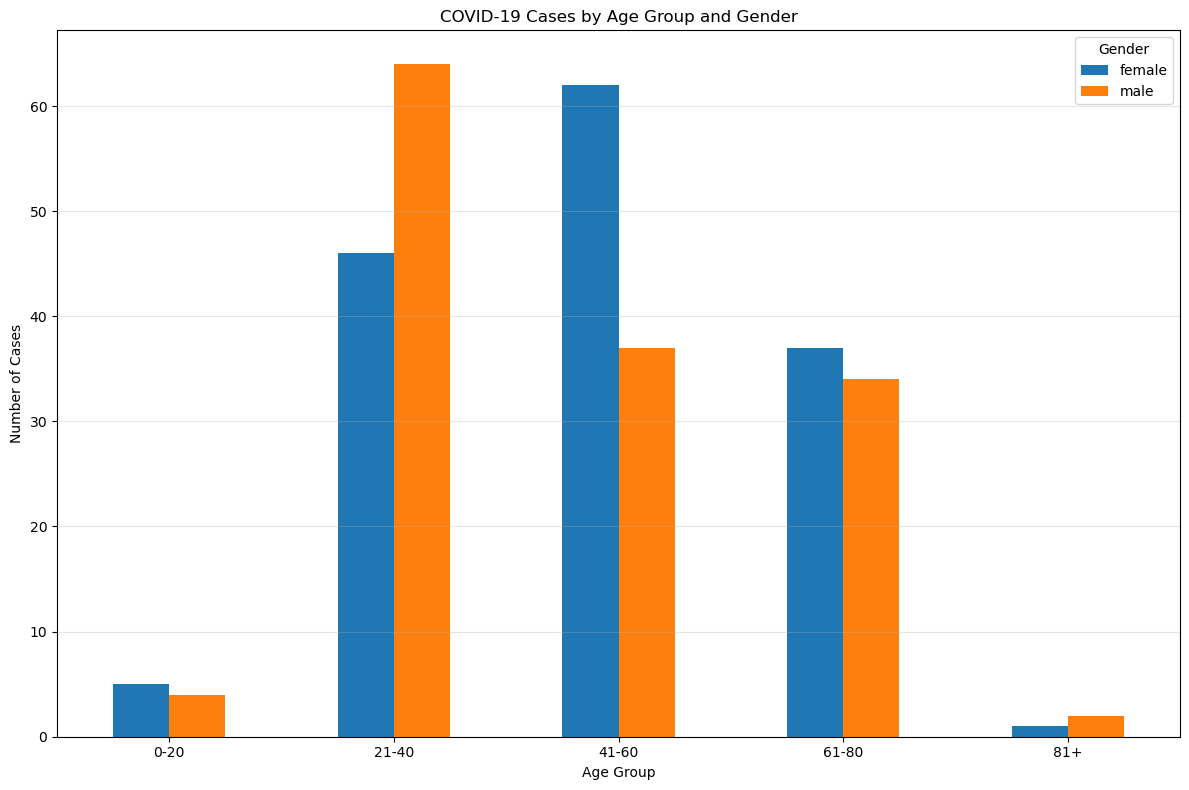


→ The Males in age group 21-40 are most affected with 64 cases


In [565]:
# Q3: Combined Age and Gender Analysis
print("\n=== COMBINED AGE & GENDER ANALYSIS ===")

# Create age groups
df1['age_group'] = pd.cut(df1['age'], 
                          bins=[0, 20, 40, 60, 80, 100],
                          labels=['0-20', '21-40', '41-60', '61-80', '81+'])

# Cross-tabulation
age_gender_cross = pd.crosstab(df1['age_group'], df1['sex'])
print("Age-Gender Cross-tabulation:")
print(age_gender_cross)

# Visualization
plt.figure(figsize=(12,8))
age_gender_cross.plot(kind='bar', figsize=(12,8))
plt.title('COVID-19 Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Which age-gender combination is most affected?
max_combination = age_gender_cross.stack().idxmax()
max_count = age_gender_cross.loc[max_combination[0], max_combination[1]]
print(f"\n→ The {max_combination[1].capitalize()}s in age group {max_combination[0]} are most affected with {max_count} cases")


 ~~~ COUNTRY-BASED INFECTION ANALYSIS ~~~
Infection distribution by country:
• Korea: 4,203 patients (99.79%)
• China: 8 patients (0.19%)
• Mongolia: 1 patients (0.02%)

→ Most affected country: Korea with 4,203 cases
   (99.79% of all cases)
Proportion analysis: 

 Korea vs the rest of the world: 4203:9
• Ratio 467.0:1

 Gender distribution by country:
sex       Unknown  female  male
country                        
China           0       6     2
Korea        3894     157   152
Mongolia        0       0     1


C:\Users\owner\AppData\Local\Temp\ipykernel_19012\3563211589.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='country', order=df1['country'].value_counts().index,


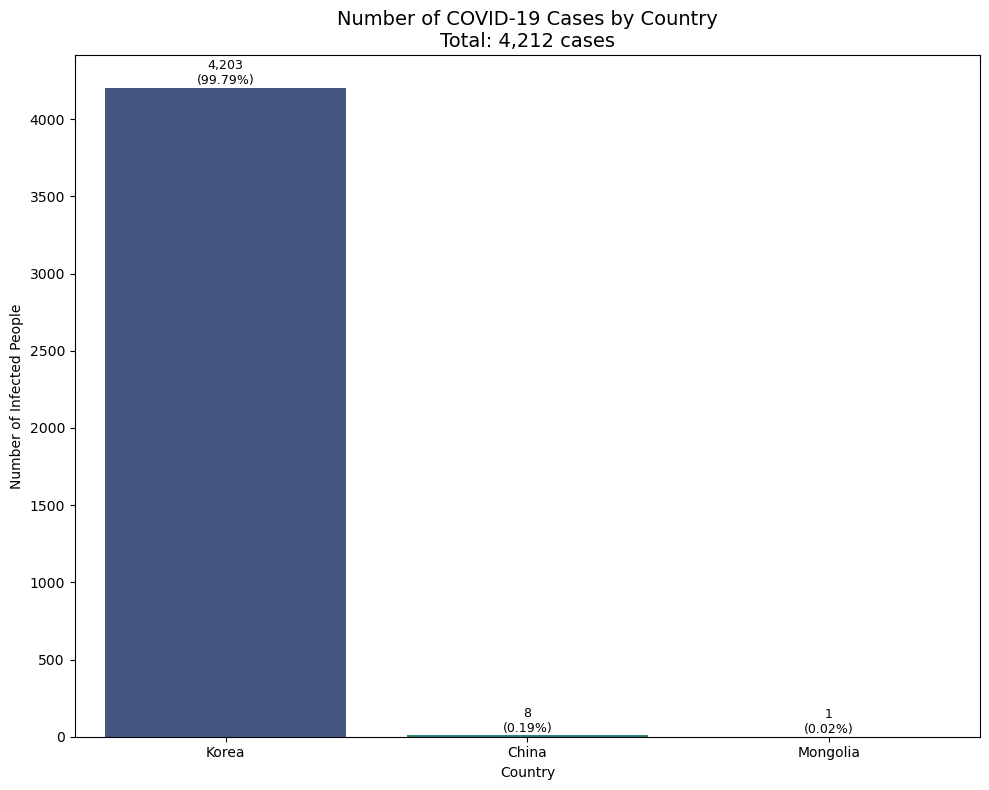

In [566]:
#Who is getting getting infected based on country
print("\n ~~~ COUNTRY-BASED INFECTION ANALYSIS ~~~")

#1. Basic counts and percentages
country_counts = df['country'].value_counts()
country_percent = (df1['country'].value_counts(normalize=True) * 100).round(2)

print("Infection distribution by country:")
for country, count in country_counts.items():
    percentage = country_percent[country]
    print(f"• {country}: {count:,} patients ({percentage}%)")

#2. Most affected country
most_affected_country = country_counts.index[0]  #First in sorted list
most_affected_count = country_counts.iloc[0]

print(f"\n→ Most affected country: {most_affected_country} with {most_affected_count:,} cases")
print(f"   ({country_percent[most_affected_country]}% of all cases)")

#Proportions
print("Proportion analysis: ")
print(f"\n {most_affected_country} vs the rest of the world: {most_affected_count}:{country_counts.sum()
 - most_affected_count:,}")
print(f"• Ratio {most_affected_count/(country_counts.sum() - most_affected_count):.1f}:1")

#Gender distribution by country
if 'sex' in df.columns:
    sex_by_country = pd.crosstab(df1['country'], df1['sex'])
    print("\n Gender distribution by country:")
    print(sex_by_country)

plt.figure(figsize=(10,8))
sns.countplot(data=df1, x='country', order=df1['country'].value_counts().index,
              palette='viridis')  # Added color palette
plt.title(f'Number of COVID-19 Cases by Country\nTotal: {country_counts.sum():,} cases', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Infected People')

ax = plt.gca()
for i, (country, count) in enumerate(country_counts.items()):
    percentage = country_percent[country]
    ax.text(i, count + 5,
            f'{count:,}\n({percentage}%)',
            ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=0) # To keep the country names horizontal
plt.tight_layout()
plt.show()

In [567]:
x = (df1['country'] == 'Korea').sum()
x

np.int64(4203)

C:\Users\owner\AppData\Local\Temp\ipykernel_19012\381753717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reason_df['all'] = 'Infections'


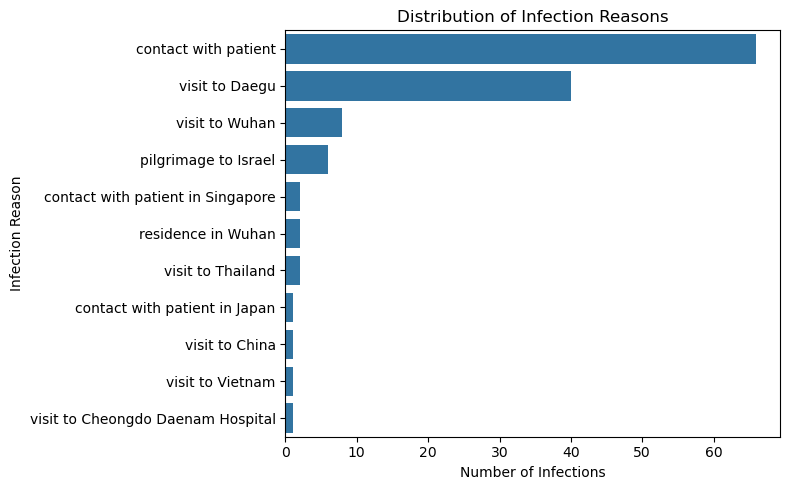

In [568]:
#Infection spread
df1
reason_df = df1.dropna(subset=['infection_reason'])
reason_df['all'] = 'Infections'

plt.figure(figsize=(8,5))

sns.countplot(
    data=reason_df,
    y='infection_reason',
    order=reason_df['infection_reason'].value_counts().index
)

plt.title('Distribution of Infection Reasons')
plt.xlabel('Number of Infections')
plt.ylabel('Infection Reason')

plt.tight_layout()
plt.show()

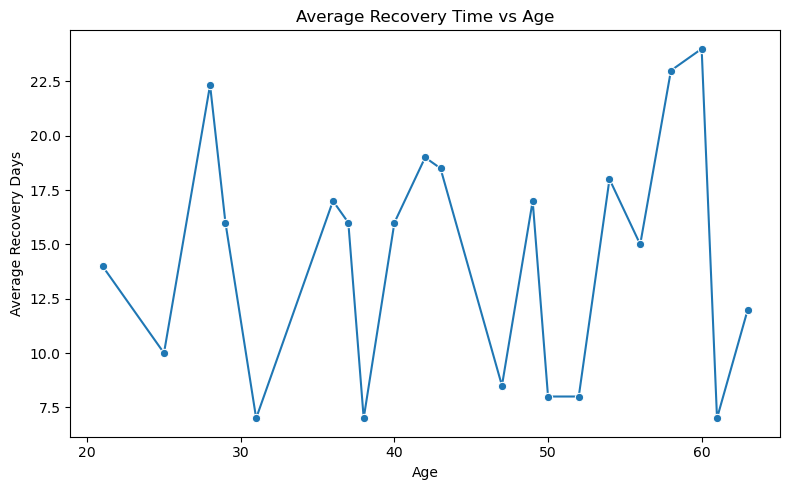

In [569]:
#Recovery trends
df1['recovery_days'] = (df1['released_date'] - df1['confirmed_date']).dt.days
recovery_df = df1.dropna(subset=['recovery_days', 'age'])
avg_recovery_by_age = recovery_df.groupby('age')['recovery_days'].mean().reset_index()

plt.figure(figsize=(8,5))

sns.lineplot(
    data=avg_recovery_by_age,
    x='age',
    y='recovery_days',
    marker='o'
)

plt.title("Average Recovery Time vs Age")
plt.xlabel("Age")
plt.ylabel("Average Recovery Days")

plt.tight_layout()
plt.show()

In [586]:
#Recovery trends by region
df1['region'] = df1['region'].fillna('Unknown')
df1['recovered'] = df1['released_date'].notna()

region_summary = df1.groupby('region').agg(
    confirmed_cases=('id', 'count'),
    recovered_cases=('recovered', 'sum')
).reset_index()

region_summary['recovery_rate'] = (
    region_summary['recovered_cases'] / region_summary['confirmed_cases']
) * 100

top5 = region_summary.sort_values(
    by='recovered_cases',
    ascending=False
)

#Top 5 recovered regions
print("\nTop 5 regions with the most recovered cases: ")
print(f"\n{top5.head(5)}")
#Conclusion
print(f"\n\nConclusion: → {region_summary.loc[region_summary['recovered_cases'].idxmax(), 'region'].capitalize()} has the most recovered cases amounting to {region_summary['recovered_cases'].max()}")

#highest recovery rate
name = region_summary.loc[region_summary['recovery_rate'].idxmax(), 'region']
print(f"\nHighest Recovery rate region: '{name.capitalize()}' with a recovery rate of {region_summary.loc[region_summary['recovery_rate'].idxmax(), 'recovery_rate']}%")
#region_summary



Top 5 regions with the most recovered cases: 

                 region  confirmed_cases  recovered_cases  recovery_rate
12         capital area              109               16      14.678899
13  filtered at airport                4                4     100.000000
6               Gwangju               10                3      30.000000
3                 Daegu               34                2       5.882353
7      Gyeongsangbuk-do              119                1       0.840336


Conclusion: → Capital area has the most recovered cases amounting to 16

Highest Recovery rate region: 'Filtered at airport' with a recovery rate of 100.0%


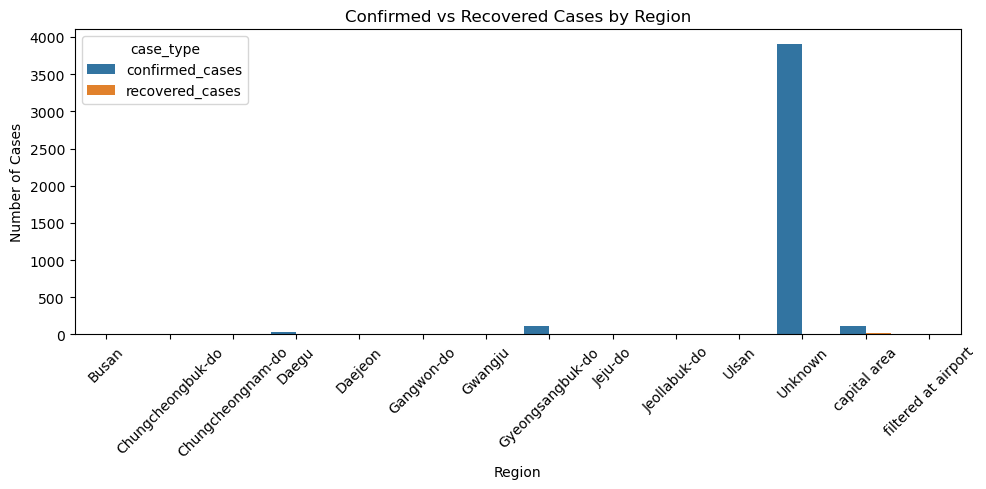

In [571]:
#Visualization of recovery trends by region
region_melted = region_summary.melt(
    id_vars='region',
    value_vars=['confirmed_cases', 'recovered_cases'],
    var_name='case_type',
    value_name='count'
)

plt.figure(figsize=(10,5))

sns.barplot(
    data=region_melted,
    x='region',
    y='count',
    hue='case_type'
)

plt.title("Confirmed vs Recovered Cases by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [572]:
#Factors influencing recovery time
#create the recovery dataset
recovery_df = df1.dropna(subset=[
    'recovery_days', 'age', 'contact_number', 'infection_order'
])
recovery_df

,id,sex,age,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age_group,recovery_days,recovered
0,1,female,36.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,21-40,17.0,True
1,2,male,56.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,41-60,12.0,True
2,3,male,54.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,41-60,17.0,True
3,4,male,56.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,41-60,13.0,True
5,6,male,56.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released,41-60,20.0,True
6,7,male,29.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released,21-40,16.0,True
7,8,female,63.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released,61-80,12.0,True
8,9,female,28.0,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released,21-40,24.0,True
9,10,female,54.0,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released,41-60,19.0,True
10,11,male,25.0,Korea,capital area,NaN,contact with patient,3.0,6.0,0.0,2020-01-31,2020-02-10,NaN,released,21-40,10.0,True


In [573]:
df1['age'].max()

83.0

C:\Users\owner\AppData\Local\Temp\ipykernel_19012\1019169264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_df['age_group'] = pd.cut(


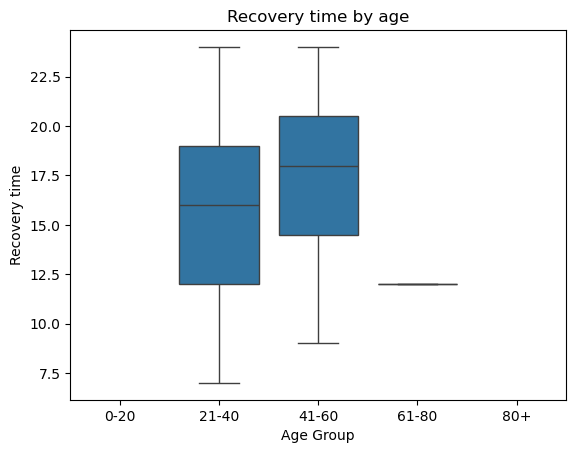

In [574]:
#Age vs Recovery

recovery_df['age_group'] = pd.cut(
    recovery_df['age'],
    bins=[0, 20, 40, 60, 80, 120],
    labels=['0-20', '21-40', '41-60', '61-80', '80+']
)

sns.boxplot(data=recovery_df, x = 'age_group', y= 'recovery_days')
plt.xlabel('Age Group')
plt.ylabel('Recovery time')
plt.title('Recovery time by age')
plt.show()

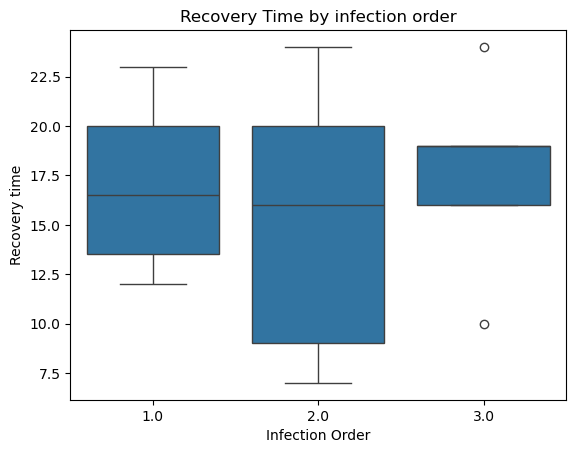

In [575]:
#Recovery by infection order
sns.boxplot(data=recovery_df, x = 'infection_order', y = 'recovery_days')
plt.title('Recovery Time by infection order')
plt.xlabel('Infection Order')
plt.ylabel('Recovery time')
plt.show()

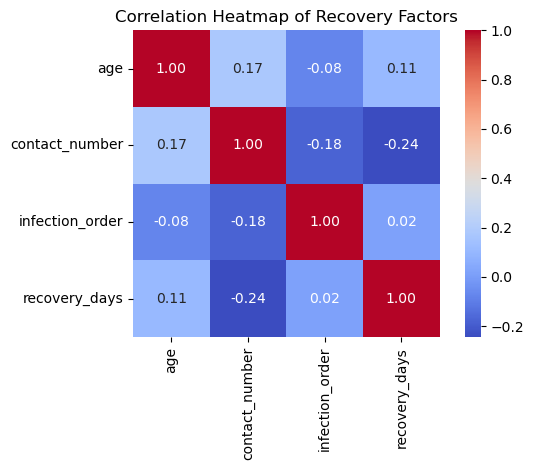

In [576]:
#Correlation heatmap

matrix = recovery_df[['age', 'contact_number', 'infection_order', 'recovery_days']].corr()
sns.heatmap(
    matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True
)

plt.title("Correlation Heatmap of Recovery Factors")
plt.tight_layout()
plt.show()


In [577]:
# summary report of findings
print("\n" + "="*50)
print("SUMMARY OF FINDINGS")
print("="*50)

print("\n1. AGE-BASED INFECTION PATTERNS:")
print(f"   • Average age of infected patients: {df1['age'].mean():.1f} years")
print(f"   • Median age: {df1['age'].median():.1f} years")
print(f"   • Most affected age group: {most_affected_group} ({most_affected_count} cases)")
print(f"   • Age range: {df1['age'].min()} - {df1['age'].max()} years")

print("\n2. GENDER-BASED INFECTION PATTERNS:")
print(f"   • Most affected gender: {most_affected_gender.capitalize()}")
print(f"   • Male to Female ratio: {gender_counts.get('male', 0)}:{gender_counts.get('female', 0)}")
if 'male' in gender_counts and 'female' in gender_counts:
    ratio = gender_counts['male'] / gender_counts['female']
    print(f"   • Ratio (M/F): {ratio:.2f}")

print("\n3. DATA QUALITY NOTES:")
print(f"   • Patients with age data: {df1['age'].notna().sum()}/{len(df1)} ({df1['age'].notna().sum()/len(df1)*100:.1f}%)")
print(f"   • Patients with gender data: {(df1['sex'] != 'Unknown').sum()}/{len(df1)} ({(df1['sex'] != 'Unknown').sum()/len(df1)*100:.1f}%)")
print("   • Note: Significant missing data in both age and gender columns")


SUMMARY OF FINDINGS

1. AGE-BASED INFECTION PATTERNS:
   • Average age of infected patients: 46.8 years
   • Median age: 48.0 years
   • Most affected age group: 21-40 (4203 cases)
   • Age range: 2.0 - 83.0 years

2. GENDER-BASED INFECTION PATTERNS:
   • Most affected gender: Unknown
   • Male to Female ratio: 155:163
   • Ratio (M/F): 0.95

3. DATA QUALITY NOTES:
   • Patients with age data: 292/4212 (6.9%)
   • Patients with gender data: 318/4212 (7.5%)
   • Note: Significant missing data in both age and gender columns
